In [1]:
import os
os.chdir('/Users/nipunchauhan/Downloads/Applied Machine Learning/Project')

In [2]:
#data exploration
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv(r"Churn_Modelling.csv")
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9681,9682,15607301,Romano,651,Spain,Female,63,8,129968.67,1,1,1,11830.53,0
7490,7491,15703177,Bell,654,France,Female,35,2,90865.80,1,1,1,86764.46,0
2135,2136,15704284,Ekechukwu,736,Germany,Male,57,9,95295.39,1,1,0,28434.44,1
431,432,15743040,Kuznetsova,724,Germany,Male,41,2,127892.57,2,0,1,199645.45,0
4183,4184,15625592,Sal,486,France,Male,26,2,0.00,2,1,1,31399.40,0
2699,2700,15600103,Alexander,633,Germany,Female,29,8,104944.10,1,1,1,97684.46,0
6999,7000,15776156,Dolgorukova,521,France,Male,27,4,121325.84,1,1,1,164223.70,1
9814,9815,15600106,Wei,631,France,Male,36,1,0.00,2,0,0,133141.34,0
1803,1804,15707078,Kruglov,577,France,Female,26,1,180530.51,1,0,0,123454.62,0
627,628,15605447,Palermo,752,France,Male,49,2,78653.84,1,1,0,7698.60,0


In [4]:
#CustomerId, Surname and RowNumber are not useful for our machine learning model.
df.drop(['CustomerId', 'Surname', 'RowNumber'], axis='columns', inplace=True)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.shape

(10000, 11)

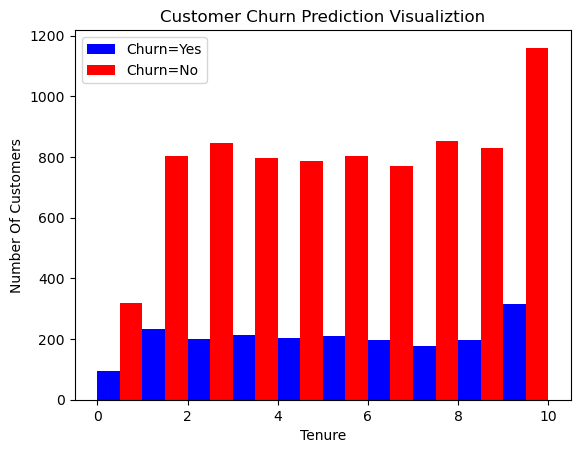

In [7]:
#Using histogram to know how many customers are loyal
tenure_churn_no = df[df.Exited== 0].Tenure
tenure_churn_yes = df[df.Exited== 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth= 1, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [8]:
# Replace gender string labels with numerical codes
df['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [9]:
#One hot encoding
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [10]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6043,629,0,31,6,0.00,2,1,0,93881.75,0,True,False,False
346,630,1,34,9,106937.05,2,1,0,138275.01,0,False,True,False
4930,627,0,30,6,112372.96,1,1,1,118029.09,0,False,True,False
6155,759,0,26,4,0.00,2,1,0,135394.62,0,True,False,False
2123,651,1,25,2,109175.14,2,1,0,114566.47,0,False,True,False


In [11]:
#Converting required columns from boolean to numericals
columns_to_convert = ['Geography_France', 'Geography_Germany', 'Geography_Spain']
df1[columns_to_convert] = df1[columns_to_convert].astype(int)

In [12]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9649,715,1,38,0,0.00,2,1,1,332.81,0,1,0,0
1390,653,1,27,9,0.00,2,1,0,96429.29,0,1,0,0
8762,350,1,60,3,0.00,1,0,0,113796.15,1,1,0,0
4846,752,1,36,7,0.00,2,1,0,184866.86,0,1,0,0
5439,713,1,61,4,149525.34,2,1,0,123663.63,0,0,1,0


In [13]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [14]:
# Columns to scale using Min-Max scaling
cols_to_scale = ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [15]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
10,0.356,0,0.175676,0.6,0.406606,0.333333,0,0,0.400886,0,1,0,0
7752,0.280,1,0.270270,0.3,0.387672,0.000000,1,1,0.463973,0,0,0,1
8947,0.702,1,0.337838,0.2,0.639369,0.000000,0,1,0.186292,0,1,0,0
5955,0.796,1,0.283784,0.9,0.529560,0.000000,1,1,0.298153,1,1,0,0
580,0.702,0,0.243243,0.8,0.000000,0.333333,1,0,0.845830,0,0,0,1


In [16]:
#dropping rows with null entries (if any)
df1_cleaned = df1.dropna()

In [17]:
df1.shape 

(10000, 13)

In [18]:
x = df1.drop('Exited', axis = 'columns')
y = df1['Exited']

In [19]:
 from sklearn.model_selection import train_test_split
    # Splitting the dataset into training and testing sets
# x represents the feature set, y represents the target variable
# 'test_size=0.2' configures 20% of the data for testing
# 'random_state=5' ensures reproducibility of the results
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [20]:
x_train.shape


(8000, 12)

In [21]:
x_test.shape

(2000, 12)

In [22]:
len(x_train.columns)

12

In [23]:
# Calculate the frequency of each class
class_distribution = df['Exited'].value_counts(normalize=True)

# Find the maximum frequency (this is the proportion of the majority class)
base_accuracy = class_distribution.max()

print(f"Base Accuracy by always predicting the majority class: {base_accuracy:.2%}")

Base Accuracy by always predicting the majority class: 79.63%


In [24]:
import tensorflow as tf
from tensorflow import keras

# Building the model using the Sequential API from Keras
model = keras.Sequential([
    # Adding a fully connected (Dense) layer with 48 neurons and ReLU activation function.
    # 'input_shape=(12,)' specifies that each input sample has 12 features.
    keras.layers.Dense(48, input_shape=(12,), activation='relu'),

    # Adding another Dense layer with 24 neurons, using ReLU activation function.
    keras.layers.Dense(24, activation='relu'),

    # Adding an output layer with 1 neuron using the sigmoid activation function
    # This setup is typical for binary classification tasks.
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model with the Adam optimizer, binary cross-entropy loss function,
# and tracking the 'accuracy' metric for evaluation.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model on the training data.
# 'epochs=5' specifies the number of times the learning algorithm will work through the entire training dataset.
model.fit(x_train, y_train, epochs=5)

2024-04-22 19:43:15.709125: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/nipunchauhan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7798 - loss: 0.5112
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4500
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8173 - loss: 0.4302
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8279 - loss: 0.4097
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.3942


In [25]:
model.fit(x_train, y_train, epochs=25)


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8482 - loss: 0.3675
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8497 - loss: 0.3587 
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8543 - loss: 0.3551
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8576 - loss: 0.3476
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8521 - loss: 0.3557
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8604 - loss: 0.3399
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3385
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3355
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8559 - loss: 0.3502
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8590 - loss: 0.3377
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8554 - loss: 0.3463
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [26]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8707 - loss: 0.3217
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8616 - loss: 0.3314
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3355
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8719 - loss: 0.3146
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8655 - loss: 0.3314
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8670 - loss: 0.3230
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8649 - loss: 0.3288
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8584 - loss: 0.3319
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8678 - loss: 0.3167
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8676 - loss: 0.3255
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8651 - loss: 0.3280
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [27]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8420 - loss: 0.3835


[0.37157848477363586, 0.8489999771118164]

In [28]:
# Predicting the output for the test dataset using the trained model
y_predicted = model.predict(x_test)

# Displaying the first five predictions from the predicted results
# The output will show the predicted probabilities of the positive class (1) for each instance
y_predicted[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.01482663],
       [0.06633975],
       [0.02297443],
       [0.07274122],
       [0.03956737]], dtype=float32)

In [29]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [30]:
y_pred = []  # Initialize an empty list to store the predicted class labels

# Iterate through each predicted probability in the list y_predicted
for element in y_predicted:
    if element > 0.5:  # Check if the probability is greater than the threshold of 0.5
        y_pred.append(1)  # If true, append 1 to y_pred indicating the positive class
    else:
        y_pred.append(0)  # If false, append 0 indicating the negative class

In [31]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [32]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.44      0.54       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

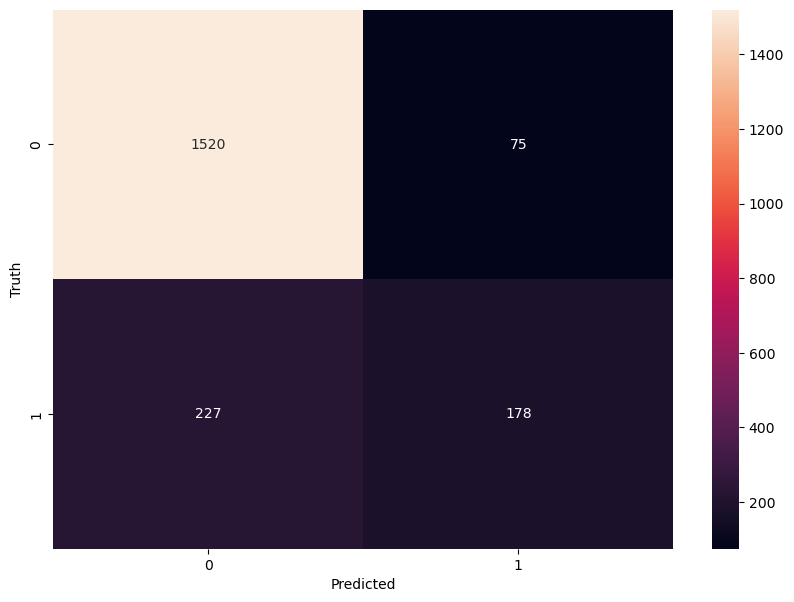

In [33]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


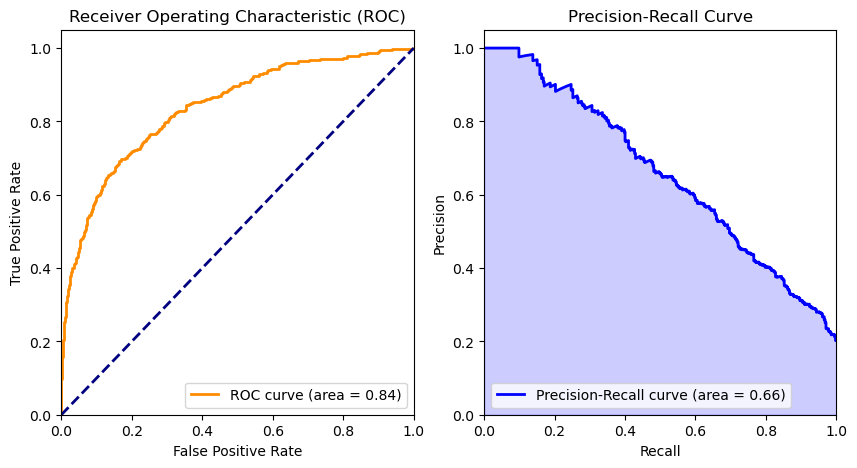

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assume 'y_test' contains the true labels and 'y_probs' contains the predicted probabilities

# Generate the predicted probabilities
y_probs = model.predict(x_test)

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Plotting the ROC curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plotting the Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()


In [35]:
#Using multivariable logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8065
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.57      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



In [36]:
#Using Decision Tress
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=5)

# Fit the model to the training data
tree_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(x_test)

# Evaluate the model's performance
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

# Print the evaluation metrics
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_tree}")
print(report_tree)

Decision Tree Classifier:
Accuracy: 0.7885
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1595
           1       0.48      0.52      0.50       405

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000

